In [168]:
# Project 1 - Breast Cancer Analysis

# COE 379L  
# Ayushi Sapru / as98489

In [169]:
# Part 1: Perform exploratory data analysis on the dataset. 

In [18]:
import pandas as pd
df = pd.read_csv("project1.csv")
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [19]:
# Identify shape and size of the raw data. 
print(f"Shape of dataset: {df.shape}")
print(f"Size of dataset: {df.size}") 

Shape of dataset: (386, 10)
Size of dataset: 3860


In [20]:
# Get info about datatypes. Check for duplicate rows and treat them. 
df.info()
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicate rows removed.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        386 non-null    object
 1   age          386 non-null    object
 2   menopause    386 non-null    object
 3   tumor-size   385 non-null    object
 4   inv-nodes    385 non-null    object
 5   node-caps    386 non-null    object
 6   deg-malig    386 non-null    int64 
 7   breast       386 non-null    object
 8   breast-quad  386 non-null    object
 9   irradiat     386 non-null    object
dtypes: int64(1), object(9)
memory usage: 30.3+ KB
Number of duplicate rows: 11
Duplicate rows removed.


In [21]:
# Check for datatype conversions. 
print(df.dtypes)

class          object
age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
dtype: object


In [14]:
# While checking the datatypes, we can see that all the variables, except for deg-malig, are saved as objects. deg-malig is of the int type. We will now perform an action to cast the values to 'category' for efficiency.

In [22]:
cat_cols = ["class", "age", "menopause", "tumor-size", "inv-nodes", "node-caps", "breast", "breast-quad", "irradiat"]
df[cat_cols] = df[cat_cols].astype("category")

# Confirm the change of datatype. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375 entries, 0 to 385
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   class        375 non-null    category
 1   age          375 non-null    category
 2   menopause    375 non-null    category
 3   tumor-size   374 non-null    category
 4   inv-nodes    374 non-null    category
 5   node-caps    375 non-null    category
 6   deg-malig    375 non-null    int64   
 7   breast       375 non-null    category
 8   breast-quad  375 non-null    category
 9   irradiat     375 non-null    category
dtypes: category(9), int64(1)
memory usage: 11.1 KB


In [26]:
# We have successfully changed the types to 'category' so we can move on. 
# Identify missing data and/or invalid values and treat them with suitable mean, median, mode, or other methods.
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 class          0
age            0
menopause      0
tumor-size     1
inv-nodes      1
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64


In [38]:
# Replace all the placeholders values (* and ?) with null.
df.replace(["?", "*"], pd.NA, inplace = True)
print("Missing values after replacement:\n", df.isnull().sum())

Missing values after replacement:
 class           0
age             0
menopause       0
tumor-size      1
inv-nodes       1
node-caps      12
deg-malig       0
breast          0
breast-quad     6
irradiat        0
dtype: int64


In [40]:
# Now we will fill in the missing/null values using mode (most common value). We will use a lambda function to help. 
cols = df.select_dtypes(include=["category", "object"]).columns
df[cols] = df[cols].apply(lambda x: x.fillna(x.mode()[0]))

print("Missing values after filling:\n", df.isnull().sum())

Missing values after filling:
 class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64


In [42]:
# Since we have treated the missing and invalid data values, we can move on to univariate analysis.
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# For the numerical columns, we can create and analyze a histogram. For the category columns, we can use bar graphs.

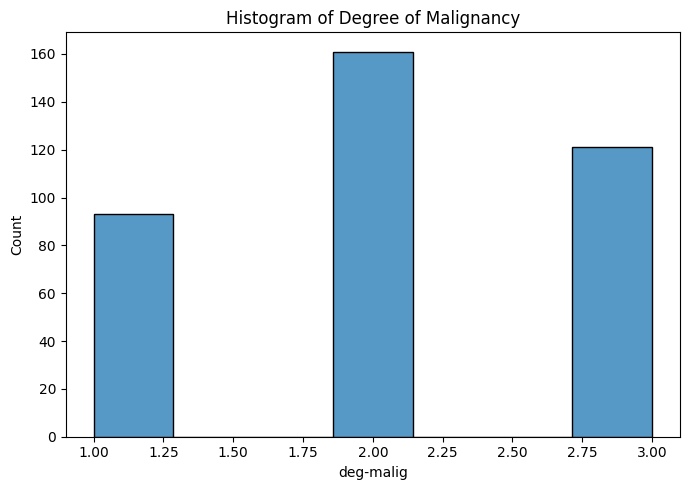

In [89]:
num_cols = df.select_dtypes(include = ["int64"]).columns

plt.figure(figsize = (7, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.histplot(df[col], bins = 7)
    plt.title(f"Histogram of Degree of Malignancy")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [60]:
# In the histogram above, we can see the distribution of the degree of malignancy across the dataset. It has 3 distinct values, and the highest frequency is observed at level 2. Next, we will see how the degree of malignancy compares to the size of the tumor. 

/tmp/ipykernel_87/44056145.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'class', data = df, palette = 'PiYG') # I asked ChatGPT to help me write this line and show me different Seaborn color palettes.


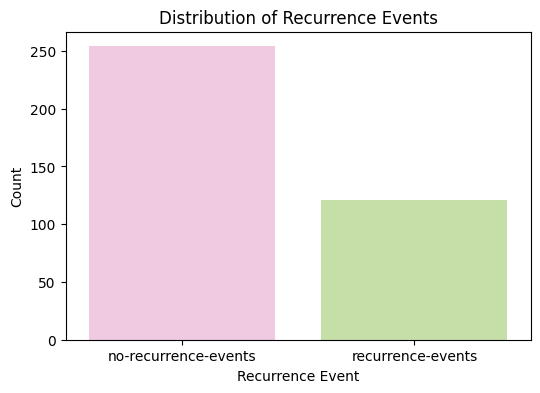

In [62]:
# Next, we will look into the recurrence of the cancer and how often it happens. 
plt.figure(figsize = (6,4))
sns.countplot(x = 'class', data = df, palette = 'PiYG') # I asked ChatGPT to help me write this line and show me different Seaborn color palettes. I used the other palettes in the next few charts.
plt.title("Distribution of Recurrence Events")
plt.xlabel("Recurrence Event")
plt.ylabel("Count")
plt.show()

In [59]:
# In the above countplot, we are visualizing the distribution of recurrence events in the dataset. The "No recurrence events" category has a significantly higher count than the "Recurrence events," indicating that most patients in the dataset did not experience cancer recurrence. This may suggest an imbalance, which can affect statistical analyses and predictive models.

/tmp/ipykernel_87/1816653182.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'breast-quad', data = df, order = df['breast-quad'].value_counts().index, palette = 'coolwarm')


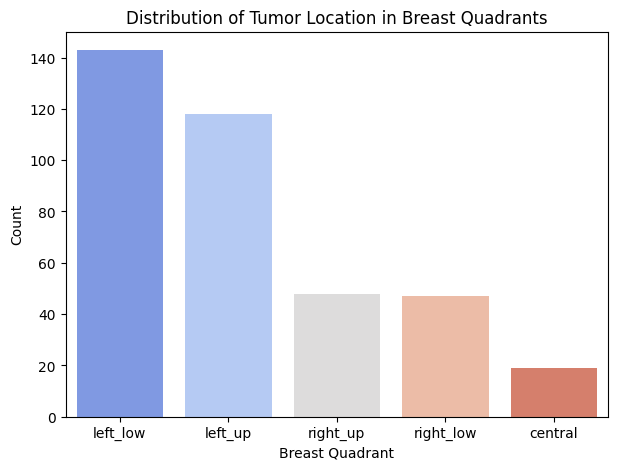

In [94]:
# Now we will plot the distribution of tumor location.  
plt.figure(figsize = (7, 5))
sns.countplot(x = 'breast-quad', data = df, order = df['breast-quad'].value_counts().index, palette = 'coolwarm')
plt.title("Distribution of Tumor Location in Breast Quadrants")
plt.xlabel("Breast Quadrant")
plt.ylabel("Count")
plt.show()

In [79]:
# Based on the plot, we can see that most tumors are located in the left quadrants, specifically the lower left side. Right quadrants have lower occurrences, and central has the least amount. This distribution could indicate to some sort of biological factors that contribute to tumor occurrences, speciffically in the left quadrants. 

/tmp/ipykernel_87/3857571200.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df["tumor-size"], order = size_order, palette = "cubehelix")


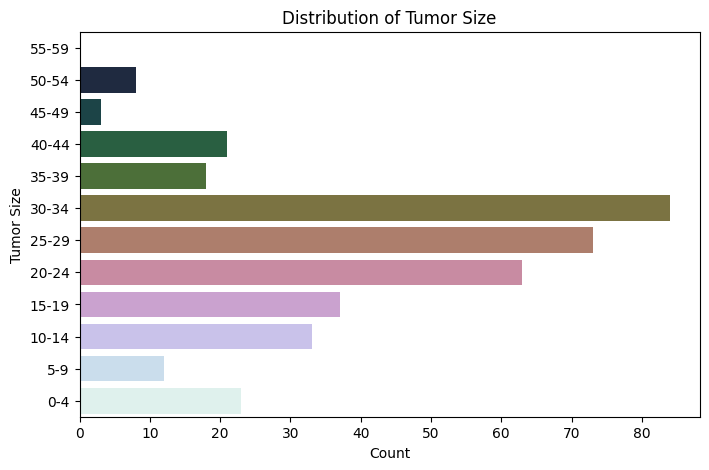

In [109]:
# Lastly, we will look at tumor size in a countplot. 

size_order = ['55-59', '50-54', '45-49', '40-44', '35-39', '30-34', '25-29', '20-24', '15-19', '10-14', '5-9', '0-4']

plt.figure(figsize = (8, 5))
sns.countplot(y = df["tumor-size"], order = size_order, palette = "cubehelix")
plt.title("Distribution of Tumor Size")
plt.xlabel("Count")
plt.ylabel("Tumor Size")
plt.show()


In [104]:
# Tumors between 30-34mm are the most frequent, followed by 25-29mm and 20-24mm. Larger tumors are relatively more rare, and most cases are diagnosed at moderate sizes. This suggests that the early detection efforts may be effective in preventing the growth of larger tumors. 

In [106]:
# Now that we have completed some univariate analyses and discussed the observations, we can move on to performing one-hot encoding on categorical variables.

In [115]:
# Perform one-hot encoding on categorical variables. 
df = pd.get_dummies(df, columns = df.select_dtypes(include = ["category"]).columns, drop_first = True)

# Display info() of the new dataset to confirm. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375 entries, 0 to 385
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   deg-malig                375 non-null    int64
 1   class_recurrence-events  375 non-null    bool 
 2   age_30-39                375 non-null    bool 
 3   age_40-49                375 non-null    bool 
 4   age_50-59                375 non-null    bool 
 5   age_60-69                375 non-null    bool 
 6   age_70-79                375 non-null    bool 
 7   menopause_lt40           375 non-null    bool 
 8   menopause_premeno        375 non-null    bool 
 9   tumor-size_5-9           375 non-null    bool 
 10  tumor-size_10-14         375 non-null    bool 
 11  tumor-size_15-19         375 non-null    bool 
 12  tumor-size_20-24         375 non-null    bool 
 13  tumor-size_25-29         375 non-null    bool 
 14  tumor-size_30-34         375 non-null    bool 
 15  tumor-size_

In [116]:
# Part 2: Fit classification models on the data to predict the recurrence class. 

In [119]:
# Split the data into training and test datasets. 

from sklearn.model_selection import train_test_split

In [120]:
print(df.columns)

Index(['deg-malig', 'class_recurrence-events', 'age_30-39', 'age_40-49',
       'age_50-59', 'age_60-69', 'age_70-79', 'menopause_lt40',
       'menopause_premeno', 'tumor-size_5-9', 'tumor-size_10-14',
       'tumor-size_15-19', 'tumor-size_20-24', 'tumor-size_25-29',
       'tumor-size_30-34', 'tumor-size_35-39', 'tumor-size_40-44',
       'tumor-size_45-49', 'tumor-size_50-54', 'tumor-size_55-59',
       'inv-nodes_12-14', 'inv-nodes_15-17', 'inv-nodes_24-26',
       'inv-nodes_3-5', 'inv-nodes_6-8', 'inv-nodes_9-11', 'node-caps_yes',
       'breast_right', 'breast-quad_left_low', 'breast-quad_left_up',
       'breast-quad_right_low', 'breast-quad_right_up', 'irradiat_yes'],
      dtype='object')


In [124]:
X = df.drop(columns = ["class_recurrence-events"])
y = df["class_recurrence-events"]

# Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

# Verify the split
print(f"Training set size: {X_train.shape}, Target: {y_train.shape}")
print(f"Test set size: {X_test.shape}, Target: {y_test.shape}")

# y_train and y_test's shapes are 1-dimensional

Training set size: (300, 32), Target: (300,)
Test set size: (75, 32), Target: (75,)


In [135]:
# We can now build perform classification using K-Nearest Neighbor Classifier.  

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors = 5)

# Train the model on the training data.
knn.fit(X_train, y_train)

# Make predictions on test set.
y_pred_knn = knn.predict(X_test)

# Evaluate the model's accuracy. 
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Classifier Accuracy: {accuracy_knn:.4f}")

# Show classification report.
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

KNN Classifier Accuracy: 0.6933

Classification Report:
               precision    recall  f1-score   support

       False       0.73      0.86      0.79        51
        True       0.53      0.33      0.41        24

    accuracy                           0.69        75
   macro avg       0.63      0.60      0.60        75
weighted avg       0.67      0.69      0.67        75



In [133]:
# The KNN classifier received an overall accuracy of 69.33% on the test set. The precision for the "True" class had a recall of 0.33, which indicates that the model was not able to correctly classify recurrence cases.

In [136]:
# Next, we will perform classification with K-Nearest Neighbor Classifier using Grid Search CV. 

In [154]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_search_accuracy = KNeighborsClassifier()

param_grid = {"n_neighbors": np.arange(1, 20)}

knn = KNeighborsClassifier()

knn_gscv = GridSearchCV(knn, param_grid, cv = 5, scoring = "accuracy", n_jobs = -1)

knn_gscv.fit(X_train, y_train)

best_k = knn_gscv.best_params_["n_neighbors"]
best_score = knn_gscv.best_score_

print(f"Optimal k: {best_k}")

Optimal k: 17


In [157]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

y_pred_knn_best = knn_best.predict(X_test)

accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)
print(f"KNN Classifier with Grid Search CV Accuracy: {accuracy_knn_best:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn_best))

KNN Classifier with Grid Search CV Accuracy: 0.7200

Classification Report:
               precision    recall  f1-score   support

       False       0.71      0.98      0.83        51
        True       0.80      0.17      0.28        24

    accuracy                           0.72        75
   macro avg       0.76      0.57      0.55        75
weighted avg       0.74      0.72      0.65        75



In [159]:
# Now we will focus on recall. 
knn_gscv_recall = GridSearchCV(knn_search_accuracy, param_grid, cv = 5, scoring = 'recall')

knn_gscv_recall.fit(X_train, y_train)
knn_recall = knn_gscv_recall.best_estimator_
knn_gscv_recall.best_params_

{'n_neighbors': 3}

In [160]:
y_pred_knn_recall = knn_recall.predict(X_test)
print(classification_report(y_test, y_pred_knn_recall))

              precision    recall  f1-score   support

       False       0.77      0.84      0.80        51
        True       0.58      0.46      0.51        24

    accuracy                           0.72        75
   macro avg       0.67      0.65      0.66        75
weighted avg       0.71      0.72      0.71        75



In [161]:
# Lastly, we will be performing classification using Linear Classification.

In [167]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter = 1000, random_state = 1)

log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy_log:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.7067

Classification Report:
               precision    recall  f1-score   support

       False       0.71      0.96      0.82        51
        True       0.67      0.17      0.27        24

    accuracy                           0.71        75
   macro avg       0.69      0.56      0.54        75
weighted avg       0.70      0.71      0.64        75



In [170]:
# Display report showing accuracy, recall, precision, and f1-score for each classification model. Which metric is most important for this problem?

In [179]:
def extract_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    return report['True']['precision'], report['True']['recall'], report['True']['f1-score']

performance_summary = pd.DataFrame({
    "Model": [
        "KNN", 
        "Optimized KNN (Grid Search)", 
        "Linear Classification"
    ],
    "Accuracy": [accuracy_knn, accuracy_knn_best, accuracy_log],
    "Precision (True)": [
        extract_metrics(y_test, y_pred_knn)[0],
        extract_metrics(y_test, y_pred_knn_best)[0],
        extract_metrics(y_test, y_pred_log)[0]
    ],
    "Recall (True)": [
        extract_metrics(y_test, y_pred_knn)[1],
        extract_metrics(y_test, y_pred_knn_best)[1],
        extract_metrics(y_test, y_pred_log)[1]
    ],
    "F1-Score (True)": [
        extract_metrics(y_test, y_pred_knn)[2],
        extract_metrics(y_test, y_pred_knn_best)[2],
        extract_metrics(y_test, y_pred_log)[2]
    ]
})

print("\nClassification Model Performance Summary:\n")
print(performance_summary.to_string(index=False))


Classification Model Performance Summary:

                      Model  Accuracy  Precision (True)  Recall (True)  F1-Score (True)
                        KNN  0.693333          0.000000       0.000000         0.000000
Optimized KNN (Grid Search)  0.720000          0.800000       0.166667         0.275862
      Linear Classification  0.706667          0.666667       0.166667         0.266667


In [180]:
# As displayed in the table above, Optimized KNN (Grid Search) is the best model for this case because it has the highest accuracy, precision, and F1-score. Recall was the most important metric because false negatives was an issue. 